# **Naive Bayes Classifier**

In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
bank_data = pd.read_excel('/content/bank-full-cleaned.xlsx')
bank_data.head()



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# used to tune features
#bank_data.drop(['age', 'contact','balance', 'job','day','month', 'duration','poutcome','pdays', 'campaign'], axis=1, inplace=True)

In [3]:
bank_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
features = bank_data.columns.tolist()
features.remove('y')
features    


In [5]:
encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(bank_data[features])
bank_data_encoded = pd.DataFrame(data_encoded, columns=features)
data_encoded

array([[ 40.,   4.,   1., ...,   0.,   0.,   3.],
       [ 26.,   9.,   2., ...,   0.,   0.,   3.],
       [ 15.,   2.,   1., ...,   0.,   0.,   3.],
       ...,
       [ 54.,   5.,   1., ..., 181.,   3.,   2.],
       [ 39.,   1.,   1., ...,   0.,   0.,   3.],
       [ 19.,   2.,   1., ..., 185.,  11.,   1.]])

In [6]:
bank_data_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,40.0,4.0,1.0,2.0,0.0,3036.0,1.0,0.0,2.0,4.0,8.0,261.0,0.0,0.0,0.0,3.0
1,26.0,9.0,2.0,1.0,0.0,945.0,1.0,0.0,2.0,4.0,8.0,151.0,0.0,0.0,0.0,3.0
2,15.0,2.0,1.0,1.0,0.0,918.0,1.0,1.0,2.0,4.0,8.0,76.0,0.0,0.0,0.0,3.0
3,29.0,1.0,1.0,3.0,0.0,2420.0,1.0,0.0,2.0,4.0,8.0,92.0,0.0,0.0,0.0,3.0
4,15.0,11.0,2.0,3.0,0.0,917.0,0.0,0.0,2.0,4.0,8.0,198.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33.0,9.0,1.0,2.0,0.0,1741.0,0.0,0.0,0.0,16.0,9.0,975.0,2.0,0.0,0.0,3.0
45207,53.0,5.0,0.0,0.0,0.0,2639.0,0.0,0.0,0.0,16.0,9.0,456.0,1.0,0.0,0.0,3.0
45208,54.0,5.0,1.0,1.0,0.0,5455.0,0.0,0.0,0.0,16.0,9.0,1116.0,4.0,181.0,3.0,2.0
45209,39.0,1.0,1.0,1.0,0.0,1584.0,0.0,0.0,1.0,16.0,9.0,508.0,3.0,0.0,0.0,3.0


In [7]:
encoder = LabelEncoder()
target_encoded = encoder.fit_transform(bank_data['y'])
bank_data_encoded['class'] = target_encoded
encoder.inverse_transform(target_encoded)

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

In [8]:
bank_data_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,class
0,40.0,4.0,1.0,2.0,0.0,3036.0,1.0,0.0,2.0,4.0,8.0,261.0,0.0,0.0,0.0,3.0,0
1,26.0,9.0,2.0,1.0,0.0,945.0,1.0,0.0,2.0,4.0,8.0,151.0,0.0,0.0,0.0,3.0,0
2,15.0,2.0,1.0,1.0,0.0,918.0,1.0,1.0,2.0,4.0,8.0,76.0,0.0,0.0,0.0,3.0,0
3,29.0,1.0,1.0,3.0,0.0,2420.0,1.0,0.0,2.0,4.0,8.0,92.0,0.0,0.0,0.0,3.0,0
4,15.0,11.0,2.0,3.0,0.0,917.0,0.0,0.0,2.0,4.0,8.0,198.0,0.0,0.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33.0,9.0,1.0,2.0,0.0,1741.0,0.0,0.0,0.0,16.0,9.0,975.0,2.0,0.0,0.0,3.0,1
45207,53.0,5.0,0.0,0.0,0.0,2639.0,0.0,0.0,0.0,16.0,9.0,456.0,1.0,0.0,0.0,3.0,1
45208,54.0,5.0,1.0,1.0,0.0,5455.0,0.0,0.0,0.0,16.0,9.0,1116.0,4.0,181.0,3.0,2.0,1
45209,39.0,1.0,1.0,1.0,0.0,1584.0,0.0,0.0,1.0,16.0,9.0,508.0,3.0,0.0,0.0,3.0,0


In [9]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(bank_data_encoded.values, i) for i in range(len(features))]
vif["Features"] = features
vif

,VIF,Features
0,5.873329,age
1,2.825890,job
2,4.976041,marital
3,3.753843,education
4,1.035675,default
5,2.915637,balance
6,2.636523,housing
7,1.214276,loan
8,2.007418,contact
9,4.153221,day


In [13]:
X_train, X_test, y_train, y_test = train_test_split(bank_data_encoded.drop('class', axis=1), bank_data_encoded['class'], test_size=0.2, random_state=0, stratify=bank_data_encoded['class'])

In [14]:
cnb = CategoricalNB()
cnb.fit(X_train, y_train)


CategoricalNB()

In [19]:
y_pred_cnb = cnb.predict(X_test)
y_prob_pred_cnb = cnb.predict_proba(X_test)
# how did our model perform?
count_misclassified = (y_test != y_pred_cnb).sum()
conf_mat = confusion_matrix(
        y_test, y_pred_cnb, labels = [1,0])

print("CategoricalNB")
print("=" * 30)
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_pred_cnb)
print('Accuracy: {:.2f}'.format(accuracy))
confsion_matrix = pd.DataFrame(conf_mat)
print('Confusion Matrix')
confsion_matrix

CategoricalNB
Misclassified samples: 1070
Accuracy: 0.88
Confusion Matrix


,0,1
0,439,619
1,451,7534


In [16]:
print("Recall score : ", recall_score(y_test, y_pred_cnb , average='micro'))
print("Precision score : ",precision_score(y_test, y_pred_cnb , average='micro'))
print("F1 score : ",f1_score(y_test, y_pred_cnb , average='micro'))

Recall score :  0.8816764348114564
Precision score :  0.8816764348114564
F1 score :  0.8816764348114565


In [17]:
print(classification_report(y_test, y_pred_cnb))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7985
           1       0.49      0.41      0.45      1058

    accuracy                           0.88      9043
   macro avg       0.71      0.68      0.69      9043
weighted avg       0.87      0.88      0.88      9043



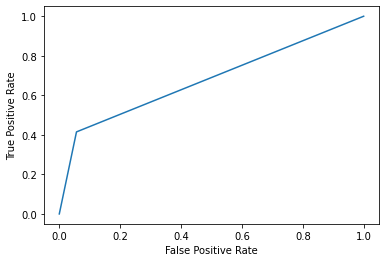

In [18]:
#define metrics
y_pred_cnb = cnb.predict(X_test)
fpr, tpr, _ = roc_curve(y_test,  y_pred_cnb)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()